In [1]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming




In [14]:

config_path = "./config_guangzhou.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

        model.msg_approx_tau(T_id)
        model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse = np.array(running_rmse)

use device: cpu


  0%|          | 0/500 [00:00<?, ?it/s]

/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  self.A = torch.matrix_exp(self.F * time_int).double()
  1%|          | 4/500 [00:00<00:14, 34.83it/s]

T_id = 0, train_rmse = 30.06, test_rmse= 29.98,test_MAE= 27.16


  5%|▍         | 24/500 [00:00<00:13, 35.32it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  A = torch.matrix_exp(self.F * time_int)
  6%|▋         | 32/500 [00:00<00:13, 34.34it/s]

T_id = 25, train_rmse = 31.16, test_rmse= 31.12,test_MAE= 28.20


 11%|█         | 56/500 [00:01<00:13, 34.14it/s]

T_id = 50, train_rmse = 30.96, test_rmse= 30.87,test_MAE= 27.49


 16%|█▌        | 80/500 [00:02<00:12, 33.51it/s]

T_id = 75, train_rmse = 29.72, test_rmse= 29.68,test_MAE= 25.75


 22%|██▏       | 108/500 [00:03<00:11, 33.25it/s]

T_id = 100, train_rmse = 28.25, test_rmse= 28.19,test_MAE= 23.80


 26%|██▋       | 132/500 [00:03<00:11, 32.73it/s]

T_id = 125, train_rmse = 27.23, test_rmse= 27.15,test_MAE= 22.33


 31%|███       | 156/500 [00:04<00:10, 32.00it/s]

T_id = 150, train_rmse = 26.36, test_rmse= 26.33,test_MAE= 21.09


 36%|███▌      | 180/500 [00:05<00:10, 31.09it/s]

T_id = 175, train_rmse = 25.84, test_rmse= 25.80,test_MAE= 20.10


 42%|████▏     | 208/500 [00:06<00:09, 31.11it/s]

T_id = 200, train_rmse = 25.01, test_rmse= 25.02,test_MAE= 18.91


 46%|████▋     | 232/500 [00:06<00:08, 30.06it/s]

T_id = 225, train_rmse = 23.53, test_rmse= 23.49,test_MAE= 17.10


 51%|█████     | 256/500 [00:07<00:08, 30.38it/s]

T_id = 250, train_rmse = 21.72, test_rmse= 21.61,test_MAE= 15.16


 56%|█████▌    | 280/500 [00:08<00:07, 29.45it/s]

T_id = 275, train_rmse = 20.54, test_rmse= 20.44,test_MAE= 13.81


 62%|██████▏   | 308/500 [00:09<00:06, 29.83it/s]

T_id = 300, train_rmse = 19.39, test_rmse= 19.28,test_MAE= 12.47


 66%|██████▋   | 332/500 [00:10<00:05, 29.57it/s]

T_id = 325, train_rmse = 18.67, test_rmse= 18.53,test_MAE= 11.54


 71%|███████   | 355/500 [00:10<00:05, 26.99it/s]

T_id = 350, train_rmse = 17.43, test_rmse= 17.35,test_MAE= 10.30


 77%|███████▋  | 383/500 [00:11<00:04, 28.74it/s]

T_id = 375, train_rmse = 15.17, test_rmse= 15.21,test_MAE= 8.59


 81%|████████▏ | 407/500 [00:12<00:03, 27.80it/s]

T_id = 400, train_rmse = 12.24, test_rmse= 12.22,test_MAE= 6.69


 86%|████████▌ | 431/500 [00:13<00:02, 27.93it/s]

T_id = 425, train_rmse = 10.59, test_rmse= 10.60,test_MAE= 5.56


 91%|█████████ | 455/500 [00:14<00:01, 27.42it/s]

T_id = 450, train_rmse = 8.83, test_rmse= 9.01,test_MAE= 4.56


 97%|█████████▋| 483/500 [00:15<00:00, 27.33it/s]

T_id = 475, train_rmse = 7.47, test_rmse= 7.65,test_MAE= 3.80


100%|██████████| 500/500 [00:15<00:00, 31.46it/s]


T_id = 499, train_rmse = 3.07, test_rmse= 3.64,test_MAE= 2.57
after smooth, test_rmse = 3.64, test_MAE= 2.57


In [18]:

config_path = "./config_guangzhou_trend_only.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

        model.msg_approx_tau(T_id)
        model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_trend_only = np.array(running_rmse)

use device: cpu


  3%|▎         | 13/500 [00:00<00:03, 124.93it/s]

T_id = 0, train_rmse = 25.62, test_rmse= 25.55,test_MAE= 23.27


  8%|▊         | 39/500 [00:00<00:03, 121.56it/s]

T_id = 25, train_rmse = 24.11, test_rmse= 24.06,test_MAE= 21.49


 13%|█▎        | 65/500 [00:00<00:03, 119.97it/s]

T_id = 50, train_rmse = 23.76, test_rmse= 23.69,test_MAE= 20.83


 18%|█▊        | 91/500 [00:00<00:03, 119.27it/s]

T_id = 75, train_rmse = 22.87, test_rmse= 22.84,test_MAE= 19.57


 23%|██▎       | 116/500 [00:00<00:03, 117.18it/s]

T_id = 100, train_rmse = 21.65, test_rmse= 21.60,test_MAE= 18.06


 28%|██▊       | 141/500 [00:01<00:03, 115.61it/s]

T_id = 125, train_rmse = 20.86, test_rmse= 20.80,test_MAE= 16.95


 33%|███▎      | 166/500 [00:01<00:02, 114.57it/s]

T_id = 150, train_rmse = 20.33, test_rmse= 20.30,test_MAE= 16.17


 38%|███▊      | 191/500 [00:01<00:02, 113.17it/s]

T_id = 175, train_rmse = 19.89, test_rmse= 19.85,test_MAE= 15.42


 43%|████▎     | 216/500 [00:01<00:02, 110.12it/s]

T_id = 200, train_rmse = 19.37, test_rmse= 19.35,test_MAE= 14.68


 48%|████▊     | 241/500 [00:02<00:02, 106.52it/s]

T_id = 225, train_rmse = 18.22, test_rmse= 18.17,test_MAE= 13.32


 53%|█████▎    | 265/500 [00:02<00:02, 105.59it/s]

T_id = 250, train_rmse = 16.68, test_rmse= 16.56,test_MAE= 11.77


 58%|█████▊    | 289/500 [00:02<00:02, 103.98it/s]

T_id = 275, train_rmse = 15.85, test_rmse= 15.72,test_MAE= 10.81


 63%|██████▎   | 314/500 [00:02<00:01, 102.93it/s]

T_id = 300, train_rmse = 15.12, test_rmse= 14.99,test_MAE= 9.94


 68%|██████▊   | 339/500 [00:03<00:01, 102.81it/s]

T_id = 325, train_rmse = 14.68, test_rmse= 14.54,test_MAE= 9.38


 73%|███████▎  | 364/500 [00:03<00:01, 99.72it/s] 

T_id = 350, train_rmse = 13.82, test_rmse= 13.72,test_MAE= 8.52


 78%|███████▊  | 388/500 [00:03<00:01, 95.77it/s]

T_id = 375, train_rmse = 11.83, test_rmse= 11.81,test_MAE= 7.12


 83%|████████▎ | 415/500 [00:03<00:00, 97.87it/s]

T_id = 400, train_rmse = 9.32, test_rmse= 9.24,test_MAE= 5.62


 88%|████████▊ | 439/500 [00:04<00:00, 96.52it/s]

T_id = 425, train_rmse = 8.25, test_rmse= 8.17,test_MAE= 4.87


 93%|█████████▎| 463/500 [00:04<00:00, 92.27it/s]

T_id = 450, train_rmse = 7.19, test_rmse= 7.17,test_MAE= 4.22


100%|█████████▉| 499/500 [00:04<00:00, 94.29it/s]

T_id = 475, train_rmse = 6.57, test_rmse= 6.57,test_MAE= 3.84


100%|██████████| 500/500 [00:05<00:00, 99.75it/s]

T_id = 499, train_rmse = 4.14, test_rmse= 4.28,test_MAE= 2.98
after smooth, test_rmse = 4.28, test_MAE= 2.98


In [18]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_guangzhou.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

# set Weight to be all ones and do not update it


model.reset()

running_rmse_no_weight = []
# _, loss_dict = model.model_test(0)
# running_rmse_no_weight.append(loss_dict["test_RMSE"])
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            # model.msg_approx_W(T_id)
            # model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            # model.msg_approx_tau(T_id)
            # model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            model.inner_smooth()
            # model.post_update_U_after_smooth(0)
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse_no_weight .append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id,prob=True)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))
    # print NLLK and crps
    print("NLLK = {:.2f}, RMSE = {:.2f}".format(loss_dict["NLLK"], loss_dict["test_RMSE"]))

    running_rmse_no_weight  = np.array(running_rmse_no_weight)



use device: cpu


  2%|▏         | 11/500 [00:00<00:04, 108.30it/s]

T_id = 0, train_rmse = 20.75, test_rmse= 20.64,test_MAE= 18.10


  8%|▊         | 42/500 [00:00<00:04, 95.34it/s] 

T_id = 25, train_rmse = 20.50, test_rmse= 20.39,test_MAE= 17.74


 13%|█▎        | 66/500 [00:00<00:04, 95.10it/s]

T_id = 50, train_rmse = 20.38, test_rmse= 20.28,test_MAE= 17.59


 17%|█▋        | 87/500 [00:00<00:04, 99.05it/s]

T_id = 75, train_rmse = 19.91, test_rmse= 19.81,test_MAE= 17.04


 25%|██▌       | 125/500 [00:01<00:03, 108.39it/s]

T_id = 100, train_rmse = 19.13, test_rmse= 19.03,test_MAE= 16.29


 27%|██▋       | 137/500 [00:01<00:03, 99.58it/s] 

T_id = 125, train_rmse = 18.71, test_rmse= 18.58,test_MAE= 15.86


 32%|███▏      | 162/500 [00:01<00:03, 93.35it/s]

T_id = 150, train_rmse = 18.50, test_rmse= 18.39,test_MAE= 15.64


 40%|████      | 200/500 [00:02<00:02, 102.40it/s]

T_id = 175, train_rmse = 18.43, test_rmse= 18.32,test_MAE= 15.56


 42%|████▏     | 211/500 [00:02<00:03, 88.23it/s] 

T_id = 200, train_rmse = 18.30, test_rmse= 18.20,test_MAE= 15.42


 48%|████▊     | 238/500 [00:02<00:02, 93.35it/s]

T_id = 225, train_rmse = 17.62, test_rmse= 17.49,test_MAE= 14.75


 53%|█████▎    | 263/500 [00:02<00:02, 90.95it/s]

T_id = 250, train_rmse = 16.73, test_rmse= 16.56,test_MAE= 13.97


 58%|█████▊    | 290/500 [00:03<00:02, 92.09it/s]

T_id = 275, train_rmse = 16.41, test_rmse= 16.23,test_MAE= 13.67


 63%|██████▎   | 314/500 [00:03<00:02, 89.67it/s]

T_id = 300, train_rmse = 16.13, test_rmse= 15.95,test_MAE= 13.37


 69%|██████▉   | 345/500 [00:03<00:01, 80.36it/s]

T_id = 325, train_rmse = 16.09, test_rmse= 15.91,test_MAE= 13.33


 73%|███████▎  | 364/500 [00:04<00:02, 67.08it/s]

T_id = 350, train_rmse = 15.86, test_rmse= 15.69,test_MAE= 13.09


 79%|███████▊  | 393/500 [00:04<00:01, 72.47it/s]

T_id = 375, train_rmse = 15.07, test_rmse= 14.92,test_MAE= 12.48


 83%|████████▎ | 414/500 [00:04<00:01, 71.62it/s]

T_id = 400, train_rmse = 14.11, test_rmse= 13.96,test_MAE= 11.79


 88%|████████▊ | 438/500 [00:05<00:00, 72.58it/s]

T_id = 425, train_rmse = 13.92, test_rmse= 13.78,test_MAE= 11.62


 93%|█████████▎| 463/500 [00:05<00:00, 74.56it/s]

T_id = 450, train_rmse = 13.79, test_rmse= 13.64,test_MAE= 11.49


 98%|█████████▊| 490/500 [00:05<00:00, 75.87it/s]

T_id = 475, train_rmse = 13.79, test_rmse= 13.65,test_MAE= 11.50


100%|██████████| 500/500 [00:06<00:00, 79.82it/s]

T_id = 499, train_rmse = 13.52, test_rmse= 13.39,test_MAE= 11.29
after smooth, test_rmse = 13.39, test_MAE= 11.29


In [2]:
# save running result as .npy file
# np.save("running_rmse/guangzhou_running_rmse.npy",running_rmse)
# np.save("running_rmse/guangzhou_running_rmse_no_weight.npy",running_rmse_no_weight)
# np.save("running_rmse/guangzhou_running_rmse_trend_only.npy",running_rmse_trend_only)

# load

running_rmse = np.load("running_rmse/guangzhou_running_rmse.npy")
running_rmse_no_weight = np.load("running_rmse/guangzhou_running_rmse_no_weight.npy")
running_rmse_trend_only = np.load("running_rmse/guangzhou_running_rmse_trend_only.npy")


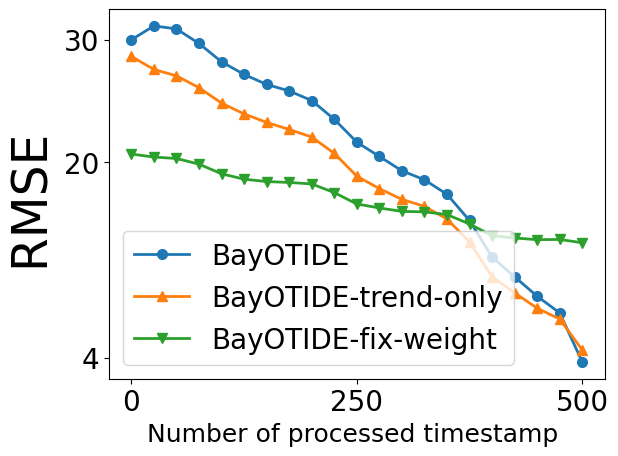

In [17]:
# plot the running rmse, with line and dots
# plt.figure(figsize=(10,10))


plt.plot(running_rmse,'o-', label = "BayOTIDE", linewidth=2,markersize=7)
plt.plot(running_rmse_trend_only,'^-', label = "BayOTIDE-trend-only",linewidth=2, markersize=7)
plt.plot(running_rmse_no_weight,'v-', label = "BayOTIDE-fix-weight",linewidth=2, markersize=7)


plt.xticks(ticks=[0,10, 20],labels=[0, 250,500],fontsize=20)
plt.xlabel("Number of processed timestamp ",fontsize=18)

plt.yticks(ticks =[4,20,30],fontsize=20)
plt.ylabel("RMSE ",fontsize=35)

plt.legend(fontsize=20)

plt.savefig("./figs/running_rmse-guangzhou.pdf",bbox_inches='tight')